## Tugas 4 DSA - Albertus Angga Raharja (1606918401, Kelas A)

In [1]:
import pandas as pd
import numpy as np
import os
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [2]:
## Hard coded constants for locating the inputs
PATH_TO_NEW_SENTIMENT_FOLDER = './New Sentiment/Sentiment/'
PATH_TO_DATASET_FILE = PATH_TO_NEW_SENTIMENT_FOLDER + 'data_latih.json'

## Membaca Data

In [3]:
data = pd.read_json(PATH_TO_DATASET_FILE)
data.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


In [4]:
raw = data['isi'].copy()
raw

0      RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...
1      @AhokDjarot Melayani warga jakarta mulai dari ...
2      @Lintank01 @AhokDjarot Golongan sumbu pendek l...
3      RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...
4      Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...
5      RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...
6      RT @Jakarta_Kece: Pak Ahok Djarot paling kece ...
7      RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...
8      15. Surah Al Maidah 51 bukan diartikan untuk m...
9      @MudasirRomini @AhokDjarot lah ahok di penjara...
10     RT @RahyaMaya: https://t.co/yxsTUmeQml Aku sia...
11     RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...
12     @Jakarta_Kece @basuki_btp @AhokDjarot @WJLF_ @...
13     RT @Jakarta_Kece: Kita adalah Warga Negara Rep...
14     @Jakarta_Kece @Fakta @AhokDjarot Wkwkwk....ada...
15     @RahyaMaya @Fakta @basuki_btp @AhokDjarot Di d...
16     7.  Contoh analoginya ada seorang pencuri di I...
17     @RahyaMaya @Fakta @basuk

## Key Norm Dict Untuk Mentransformasi Kata Tidak Baku Menjadi Baku

In [5]:
PATH_TO_KEY_NORM_FILE = PATH_TO_NEW_SENTIMENT_FOLDER + 'key_norm.csv'

key_norm = pd.read_csv(PATH_TO_KEY_NORM_FILE).drop(['_id'], axis=1)
key_norm.head()

,singkat,hasil
0,abis,habis
1,accent,tekanan
2,accept,terima
3,accident,kecelakaan
4,achievement,prestasi


In [6]:
key_norm_dict = {key_norm['singkat'][i]:key_norm['hasil'][i] for i in range(len(key_norm))}
key_norm_dict

{'abis': 'habis',
 'accent': 'tekanan',
 'accept': 'terima',
 'accident': 'kecelakaan',
 'achievement': 'prestasi',
 'acra': 'acara',
 'acrany': 'acaranya',
 'acrnya': 'acaranya',
 'action': 'aksi',
 'active': 'aktif',
 'activity': 'aktivitas',
 'actually': 'sebenarnya',
 'actualy': 'sebenarnya',
 'ad': 'ada',
 'ade': 'ada',
 'adult': 'dewasa',
 'adventure': 'petualangan',
 'adventurer': 'petualang',
 'advice': 'nasehat',
 'after': 'setelah',
 'afternun': 'sore',
 'again': 'lagi',
 'agency': 'perwakilan',
 'agent': 'agen',
 'agk': 'agak',
 'agktn': 'angkatan',
 'agree': 'setuju',
 'agreement': 'persetujuan',
 'aing': 'saya',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'aje': 'saja',
 'ajeh': 'saja',
 'ajk': 'ajak',
 'ak': 'saya',
 'akeh': 'banyak',
 'akhire': 'akhirnya',
 'aktifkn': 'aktifkan',
 'aku': 'saya',
 'alhamdlh': 'alhamdulillah',
 'alhamdulilah': 'alhamdulillah',
 'almost': 'hampir',
 'almt': 'alamat',
 'alone': 'sendiri',
 'alsn': 'alasan',
 'also': 'juga',
 'always': '

## Membaca Custom Stop Word List `stopword_list_TALA.txt`

In [7]:
PATH_TO_STOP_WORD_LIST_FILE = PATH_TO_NEW_SENTIMENT_FOLDER + 'stopword_list_TALA.txt'

with open(PATH_TO_STOP_WORD_LIST_FILE, 'r') as stop_word_list_file:
    stop_words = [word.rstrip('\n').lower() for word in stop_word_list_file.readlines()]

stop_words

['at_user',
 'atuser',
 'url',
 'rt',
 'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdata

## Basic Preprocessing

In [113]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

import re

# Create StopWord Removal using our own Stop words
stop_word_remover = StopWordRemover(ArrayDictionary(stop_words))

# Create stemmer
stemmer = StemmerFactory().create_stemmer()

def formalize(word):
    if word in key_norm_dict:
        return key_norm_dict[word]
    return word

def preprocess_tweet(tweet, debug = False):
    if debug: print(tweet)
    
    # Lower casing
    clean_tweet = tweet.lower() #lowercase
    
    # URL Removal and Username removal
    clean_tweet = re.sub(r"(?:\@|https?\://)\S+", " ", clean_tweet)
    if debug: print('After URL and username removal: ', clean_tweet)
    
    # Punctuation removal
    clean_tweet = re.sub(r'[^\w\s]',' ',clean_tweet)
    if debug: print('After punctuation removal: ', clean_tweet)
    
    # Extra space removal
    clean_tweet = re.sub('\s+', ' ', clean_tweet)
    if debug: print('After extra space removal: ', clean_tweet)
    
     # Trimming
    clean_tweet = clean_tweet.strip()
    if debug: print('After trimming: ', clean_tweet)
     
    # Stop words removal
    clean_tweet = stop_word_remover.remove(clean_tweet)
    if debug: print('After stop words removal: ', clean_tweet)
    
    # Transforming informal words to formal words
    clean_tweet = " ".join([formalize(word) for word in word_tokenize(clean_tweet)])
    if debug: print('After transofrming informal words: ', clean_tweet)
    
#     # Repeating characters removal
#     copy_clean_tweet = clean_tweet
#     rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE) #regex for repeating characters
#     clean_tweet = re.sub(rpt_regex, '', clean_tweet)
#     if copy_clean_tweet != clean_tweet:
#         print('After repeating characters removal: ', clean_tweet)
    
    # Stemming
    clean_tweet = stemmer.stem(clean_tweet)
    if debug: print('After stemming: ', clean_tweet)
    
    return clean_tweet

In [114]:
cleaned = pd.Series([preprocess_tweet(tweet) for tweet in data['isi']])
data['isi'] = cleaned
data

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,penasaran basukidjarot pertany nkepo kepoinpel...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,layan warga jakarta lahir program fr ahok,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,golong sumbu pendek fpi piara keluarga cendana...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,ahok didzolimi ahok bebas fr ahok,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana pndpt ah...,positif,Tue Apr 04 13:50:01 +0000 2017
5,@AhokDjarot,2357765268,ahok didzolimi ahok bebas fr ahok,positif,Tue Apr 04 13:43:59 +0000 2017
6,@AhokDjarot,3970978754,ahok djarot gaul badai tata kota jakarta fr ahok,positif,Tue Apr 04 13:43:02 +0000 2017
7,@AhokDjarot,60637169,penasaran basukidjarot pertany nkepo kepoinpel...,netral,Tue Apr 04 13:41:17 +0000 2017
8,@AhokDjarot,1335669534,15 surah al maidah 51 arti umat pilih pimpin m...,positif,Tue Apr 04 13:41:01 +0000 2017
9,@AhokDjarot,1222354812,ahok penjara bersih2 penjara biar ahok,negatif,Tue Apr 04 13:39:44 +0000 2017


## Komparasi setelah dan sebelum preprocessing

In [115]:
raw.head()

0    RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...
1    @AhokDjarot Melayani warga jakarta mulai dari ...
2    @Lintank01 @AhokDjarot Golongan sumbu pendek l...
3    RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...
4    Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...
Name: isi, dtype: object

In [116]:
cleaned.head()

0    penasaran basukidjarot pertany nkepo kepoinpel...
1            layan warga jakarta lahir program fr ahok
2    golong sumbu pendek fpi piara keluarga cendana...
3                    ahok didzolimi ahok bebas fr ahok
4    prof edward omar sharif h ahli pidana pndpt ah...
dtype: object

In [117]:
for tweet in data['isi']:
    for word in word_tokenize(tweet):
        if word in stop_words:
            print(tweet, word)

# 2 - Word Cloud untuk setiap kelas Sentimen

In [118]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

def plot_word_cloud(data):
    wordcloud = WordCloud().generate(" ".join(data['isi']))
    plt.figure(figsize = (16, 8))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

## Nilai Sentimen pada Data

In [119]:
set(data['sentimen'])

{'negatif', 'netral', 'positif'}

## Word Cloud untuk Kelas Sentimen = Positif

In [120]:
positif_data = data[data['sentimen'] == 'positif']
positif_data

,akun,id_user,isi,sentimen,tanggal
1,@AhokDjarot,3166296157,layan warga jakarta lahir program fr ahok,positif,Tue Apr 04 14:00:01 +0000 2017
3,@AhokDjarot,710566116553166849,ahok didzolimi ahok bebas fr ahok,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,prof edward omar sharif h ahli pidana pndpt ah...,positif,Tue Apr 04 13:50:01 +0000 2017
5,@AhokDjarot,2357765268,ahok didzolimi ahok bebas fr ahok,positif,Tue Apr 04 13:43:59 +0000 2017
6,@AhokDjarot,3970978754,ahok djarot gaul badai tata kota jakarta fr ahok,positif,Tue Apr 04 13:43:02 +0000 2017
8,@AhokDjarot,1335669534,15 surah al maidah 51 arti umat pilih pimpin m...,positif,Tue Apr 04 13:41:01 +0000 2017
10,@AhokDjarot,545368722,tun program un ul ahok djarot fr ahok,positif,Tue Apr 04 13:36:59 +0000 2017
11,@AhokDjarot,545368722,ahok didzolimi ahok bebas fr ahok,positif,Tue Apr 04 13:36:49 +0000 2017
12,@AhokDjarot,794537177472303104,ik t,positif,Tue Apr 04 13:35:44 +0000 2017
13,@AhokDjarot,794537177472303104,warga negara republik indonesia sosok ahok fr ...,positif,Tue Apr 04 13:35:33 +0000 2017


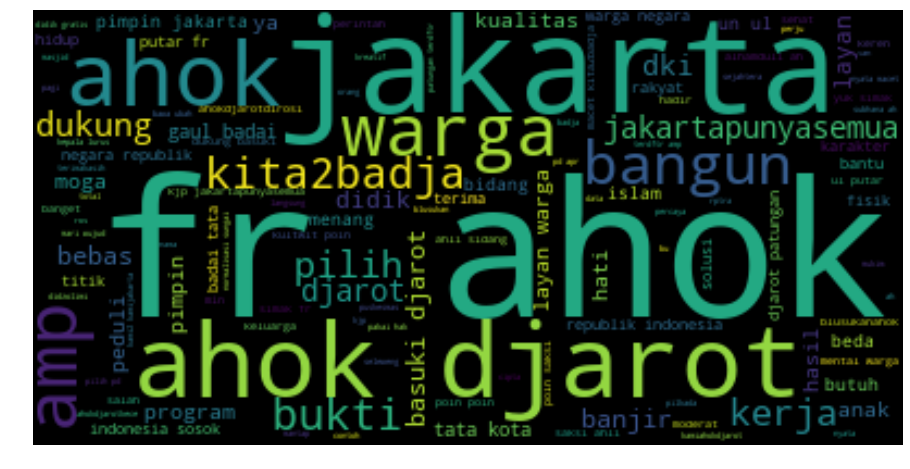

In [121]:
plot_word_cloud(positif_data)

## Word Cloud untuk Sentimen = Netral

In [122]:
netral_data = data[data['sentimen'] == 'netral']
netral_data

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,penasaran basukidjarot pertany nkepo kepoinpel...,netral,Tue Apr 04 14:04:05 +0000 2017
7,@AhokDjarot,60637169,penasaran basukidjarot pertany nkepo kepoinpel...,netral,Tue Apr 04 13:41:17 +0000 2017
74,@AhokDjarot,2883237643,ahokdjarotdirosi warga dki harap pilkada dki pu,netral,Tue Apr 04 12:46:31 +0000 2017
76,@AhokDjarot,799108167170949121,ahok tkw saudi kerja bersih bersih masjid 1 ko...,netral,Tue Apr 04 12:38:30 +0000 2017
90,@AhokDjarot,1363774536,ya kembar wakil gubernur,netral,Tue Apr 04 11:02:02 +0000 2017
97,@AhokDjarot,1363604977,lombamiripdjarot,netral,Tue Apr 04 10:54:26 +0000 2017
99,@AhokDjarot,815843569193783296,seru nih lomba lombamiripdjarot,netral,Tue Apr 04 10:52:45 +0000 2017
102,@AhokDjarot,827412451213746176,mbah sampean kali kawan saudara ikutin lombami...,netral,Tue Apr 04 10:31:43 +0000 2017
103,@AhokDjarot,827461839827005440,ayo slankers kali lombamiripdjarot,netral,Tue Apr 04 10:29:57 +0000 2017
105,@AhokDjarot,841558591500767234,om2 nyok lombamiripdjarot,netral,Tue Apr 04 10:15:46 +0000 2017


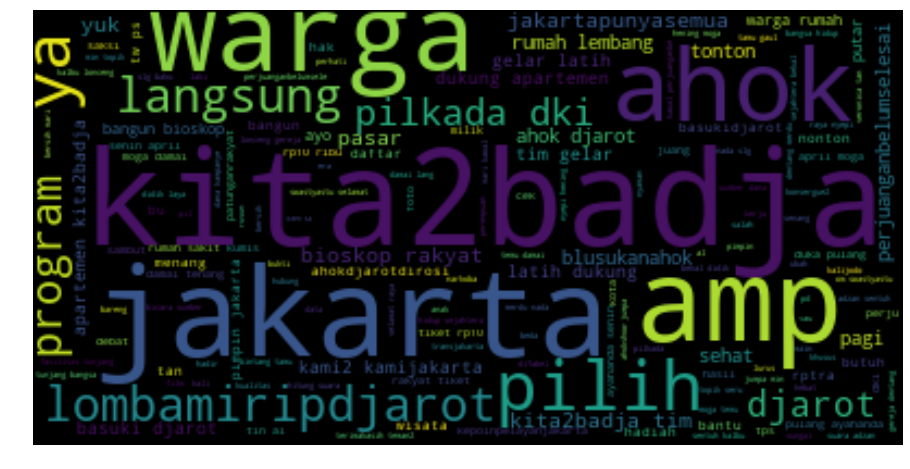

In [123]:
plot_word_cloud(netral_data)

## Word Cloud untuk Sentimen = 'negatif'

In [124]:
negative_data = data[data['sentimen'] == 'negatif']
negative_data

,akun,id_user,isi,sentimen,tanggal
2,@AhokDjarot,799108167170949121,golong sumbu pendek fpi piara keluarga cendana...,negatif,Tue Apr 04 13:56:37 +0000 2017
9,@AhokDjarot,1222354812,ahok penjara bersih2 penjara biar ahok,negatif,Tue Apr 04 13:39:44 +0000 2017
14,@AhokDjarot,230151878,wkwkwk udang dbalik batu,negatif,Tue Apr 04 13:34:27 +0000 2017
15,@AhokDjarot,230151878,dzolimi bgmana jela mendolimi umat islam sampe...,negatif,Tue Apr 04 13:33:24 +0000 2017
17,@AhokDjarot,230151878,nista agama y,negatif,Tue Apr 04 13:32:04 +0000 2017
69,@AhokDjarot,2207159918,jakarta bersyariah wujud jakarta berbhi eka pi...,negatif,Tue Apr 04 13:01:01 +0000 2017
78,@AhokDjarot,3314956485,dukung jujur bohong percaya,negatif,Tue Apr 04 12:04:47 +0000 2017
79,@AhokDjarot,1353959941,nya ya oke,negatif,Tue Apr 04 11:59:34 +0000 2017
80,@AhokDjarot,847636767490490368,bodoh dukung,negatif,Tue Apr 04 11:54:15 +0000 2017
81,@AhokDjarot,847636767490490368,dukung jujur bohong percaya,negatif,Tue Apr 04 11:53:19 +0000 2017


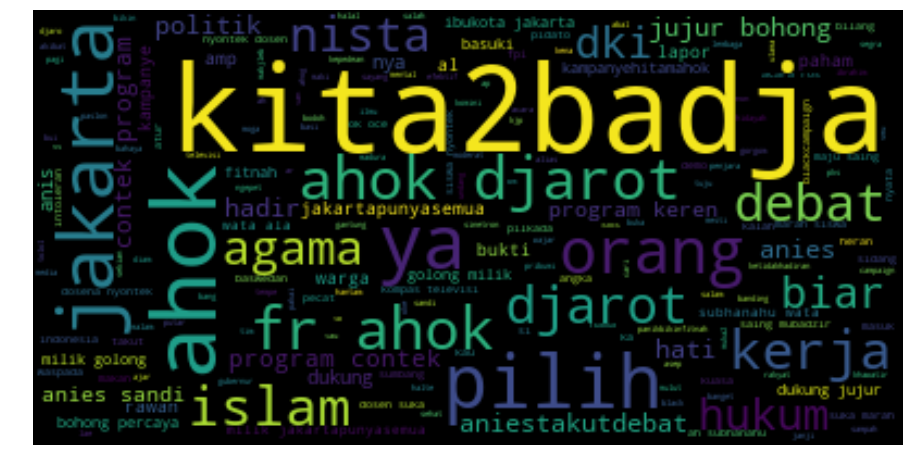

In [125]:
plot_word_cloud(negative_data)

# 3 - Feature Extraction

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

## Feature Extraction with TF-IDF

In [151]:
def extract_tf_idf(tweet_list):
    vectorizer = TfidfVectorizer(max_features=2000, min_df=5,) # inisiasi fungsi TF IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(np.array(tweet_list)).toarray()
    return tfidf_matrix

## Feature Extraction with Bag of Words

In [162]:
def extract_bag_of_words(tweet_list):
    vectorizer = CountVectorizer(max_features=2000, min_df=3, max_df=0.7)  
    return vectorizer.fit_transform(np.array(tweet_list)).toarray()

In [163]:
tf_idf_feature = extract_tf_idf(cleaned)

In [164]:
bag_of_words_feature = extract_bag_of_words(cleaned)

# 4 - Klasifikasi

In [165]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

def classify(feature):
    classifiers = [
        KNeighborsClassifier(3),
        DecisionTreeClassifier(),
        LinearSVC()
    ]
    for classifier in classifiers:
        scores = cross_val_score(classifier, feature, data['sentimen'], cv=10)
        print("="*30)
        print(classifier.__class__.__name__)
        print('****Results****')
        print("Accuracy: %f (+/- %.2f)" % (scores.mean(), scores.std() * 2))
        print("="*30 + "\n")

## Klasifikasi dengan Fitur TF-IDF saja

In [169]:
classify(tf_idf_feature)

KNeighborsClassifier
****Results****
Accuracy: 0.521446 (+/- 0.11)

DecisionTreeClassifier
****Results****
Accuracy: 0.570363 (+/- 0.14)

LinearSVC
****Results****
Accuracy: 0.559719 (+/- 0.17)



## Klasifikasi dengan Fitur Bag-of-Words saja

In [170]:
classify(bag_of_words_feature)

KNeighborsClassifier
****Results****
Accuracy: 0.515158 (+/- 0.16)

DecisionTreeClassifier
****Results****
Accuracy: 0.565558 (+/- 0.14)

LinearSVC
****Results****
Accuracy: 0.581312 (+/- 0.14)



## Klasifikasi dengan Kedua Fitur

In [171]:
classify(np.concatenate((tf_idf_feature, bag_of_words_feature), axis=1))

KNeighborsClassifier
****Results****
Accuracy: 0.500982 (+/- 0.16)

DecisionTreeClassifier
****Results****
Accuracy: 0.567306 (+/- 0.15)

LinearSVC
****Results****
Accuracy: 0.568956 (+/- 0.14)



## Analisis

Hasil analisis:
- Akurasi tertinggi didapatkan dengan menggunakan model **LinearSVC** dengan fitur Bag of Words saja.
- Sedangkan, akurasi terendah didapatkan dengan menggunakan model **KNeighbors** dengan penggabungan dua fitur tersebut.
- DecisionTreeClassifier merupakan classifier yang paling stabil dengan akurasi 56-57%
- KNeighborsClassifier merupakan classifier dengan nilai akurasi paling rendah di antara kedua classifier yang lain pada 3 fitur yang berbeda
- Penggunaan dua fitur secara sekaligus tidak meningkatkan secara drastis akurasi klasifikasi